In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Caricamento del dataset
train = pd.read_csv("dataset/DatasetClassification/TrainDataset20%.csv")
test = pd.read_csv("dataset/DatasetClassification/TestDataset20%.csv")

X_train = train[['points','uci_points','length','climb_total','profile','startlist_quality','position','cyclist_age','delta']]
y_train = train['label']

X_test = test[['points','uci_points','length','climb_total','profile','startlist_quality','position','cyclist_age','delta']]
y_test = test['label']

from collections import Counter
print(Counter(y_train))



Counter({1: 93271, 0: 17061})


In [14]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

class_weights = dict(
    zip(
        np.array([0, 1]),  # Converti in array numpy
        compute_class_weight(
            class_weight='balanced', 
            classes=np.array([0, 1]),  # Assicurati che sia un numpy array
            y=y_train
        )
    )
)


In [16]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': [None, {0: 0.35, 1: 0.65}]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42), 
    param_distributions, 
    n_iter=20, 
    scoring='f1_weighted', 
    cv=5,
    random_state=42
)
random_search.fit(X_train, y_train)
print(random_search.best_params_)


{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': None, 'class_weight': {0: 0.35, 1: 0.65}}


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Definisci il modello
rf = RandomForestClassifier(
    n_estimators=30, 
    criterion='gini', 
    max_features=3, 
    max_depth=4, 
    min_samples_split=2, 
    min_samples_leaf=8, 
    bootstrap=True
)

# Addestra il modello sul set di training
rf.fit(X_train, y_train)

# Effettua le predizioni sul set di test
test_pred_rf = rf.predict(X_test)

# Stampa il report di classificazione
print(classification_report(y_test, test_pred_rf, target_names=['<=50', '>50']))
print(confusion_matrix(y_test, test_pred_rf))


              precision    recall  f1-score   support

        <=50       1.00      1.00      1.00       939
         >50       1.00      1.00      1.00      6125

    accuracy                           1.00      7064
   macro avg       1.00      1.00      1.00      7064
weighted avg       1.00      1.00      1.00      7064

[[ 939    0]
 [   0 6125]]


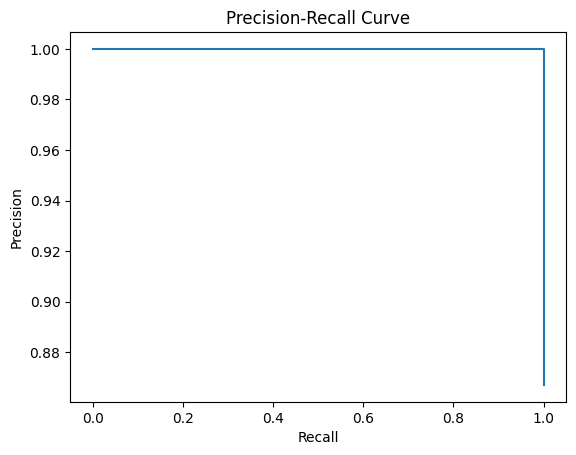

AUC Precision-Recall: 1.0


In [20]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

probs = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print('AUC Precision-Recall:', auc(recall, precision))
